In [2]:
from google.colab import files
files=files.upload()

Saving prj14.fasta to prj14.fasta


After 1 steps: 116 amino acid changes
After 2 steps: 119 amino acid changes
After 3 steps: 107 amino acid changes
After 4 steps: 117 amino acid changes
After 5 steps: 104 amino acid changes
After 6 steps: 108 amino acid changes
After 7 steps: 109 amino acid changes
After 8 steps: 112 amino acid changes
After 9 steps: 113 amino acid changes
After 10 steps: 108 amino acid changes
After 11 steps: 121 amino acid changes
After 12 steps: 115 amino acid changes
After 13 steps: 117 amino acid changes
After 14 steps: 121 amino acid changes
After 15 steps: 108 amino acid changes
After 16 steps: 106 amino acid changes
After 17 steps: 123 amino acid changes
After 18 steps: 112 amino acid changes
After 19 steps: 127 amino acid changes
After 20 steps: 114 amino acid changes
After 21 steps: 122 amino acid changes
After 22 steps: 102 amino acid changes
After 23 steps: 121 amino acid changes
After 24 steps: 113 amino acid changes
After 25 steps: 132 amino acid changes
After 26 steps: 117 amino acid cha

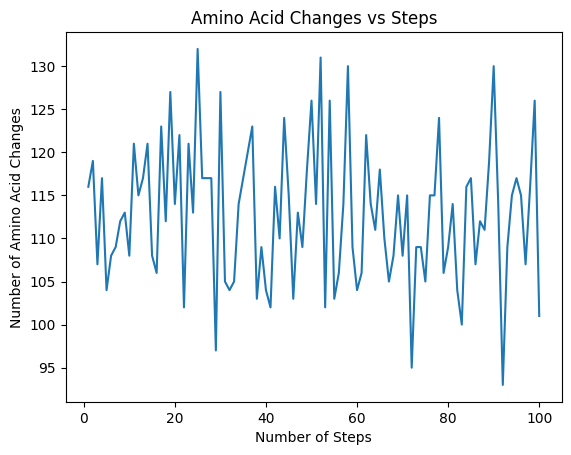

In [6]:
import random
import matplotlib.pyplot as plt
def read_fasta(file_path):
    file = open(file_path, 'r')
    lines = file.readlines()
    header = lines[0].strip()
    sequence = ''
    for line in lines[1:]:
        sequence += line.strip()
    file.close()
    return header, sequence
def translate_protein(sequence, codon_table):
    protein = ''
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if codon in codon_table:
            protein += codon_table[codon]
    return protein
def mutate_sequence(sequence):
    nucleotides = ['A', 'C', 'G', 'T']
    position = random.randint(0, len(sequence) - 1)
    new_nucleotide = random.choice(nucleotides)
    mutated_sequence = sequence[:position] + new_nucleotide + sequence[position + 1:]
    return mutated_sequence, position,  new_nucleotide
def simulate_mutation(sequence, codon_table, num_steps):
    initial_protein = translate_protein(sequence, codon_table)
    amino_acid_changes = 0
    current_protein = initial_protein
    for _ in range(num_steps):
        mutated_sequence, position, new_nucleotide = mutate_sequence(sequence)
        if len(translate_protein(mutated_sequence, codon_table)) < len(initial_protein) / 2 or '_' not in translate_protein(mutated_sequence, codon_table):
            sequence = mutated_sequence
            continue
        changes = 0
        for i in range(len(translate_protein(mutated_sequence, codon_table))):
            if current_protein[i] != translate_protein(mutated_sequence, codon_table)[i]:
                changes += 1
        if changes > 0:
            amino_acid_changes += changes
        current_protein = translate_protein(mutated_sequence, codon_table)
        sequence = mutated_sequence
    for i in range(len(initial_protein)):
        if current_protein[i] != initial_protein[i]:
            amino_acid_changes += 1
    return initial_protein, amino_acid_changes

codon_table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
file_path = 'prj14.fasta'
header, sequence = read_fasta(file_path)
num_steps = 100
num_simulations = 100
amino_acid_changes_list = []
zero_changes_steps = []
for i in range(num_simulations):
    initial_protein, num_changes = simulate_mutation(sequence, codon_table, num_steps)
    amino_acid_changes_list.append(num_changes)
    if num_changes == 0:
        zero_changes_steps.append(i+1)
    else:
        print(f"After {i + 1} steps: {num_changes} amino acid changes")
if zero_changes_steps:
    print(f"No amino acid changes after steps: {zero_changes_steps}")
plt.plot(range(1, num_simulations + 1), amino_acid_changes_list)
plt.xlabel('Number of Steps')
plt.ylabel('Number of Amino Acid Changes')
plt.title('Amino Acid Changes vs Steps')
plt.show()